In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data, encoding="ISO-8859-1")
ride_data_df = pd.read_csv(ride_data, encoding="ISO-8859-1")

#city_data_df.head
#ride_data_df.head

# Combine the data into a single dataset
combined_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
combined_data


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents

# group data by type

fare_complete = combined_data.sum()[["fare"]]
#fare_complete

# this will create a groupby object
typegb_df = combined_data.groupby('type')
#typegb_df



#total fair value by city type group
total_fare = typegb_df.sum()[["fare"]]
#total_fare

#tf_count = total_fare.count()
#tf_count


#Answer = fare_complete.div(total_fare).mul(100).round(2) + '%'



##PIE CHART TIME 



# Build Pie Chart
types = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [39854.38, 19356.33, 4327.93]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure


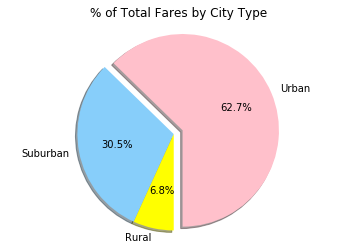

In [5]:
# Show Figure
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=types, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [6]:
# Calculate Ride Percents

# Build Pie Chart
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0, 0)

# Save Figure


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [8]:
# Calculate Driver Percents

# Build Pie Charts
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0, 0)
# Save Figure


In [9]:
# Show Figure
plt.show()